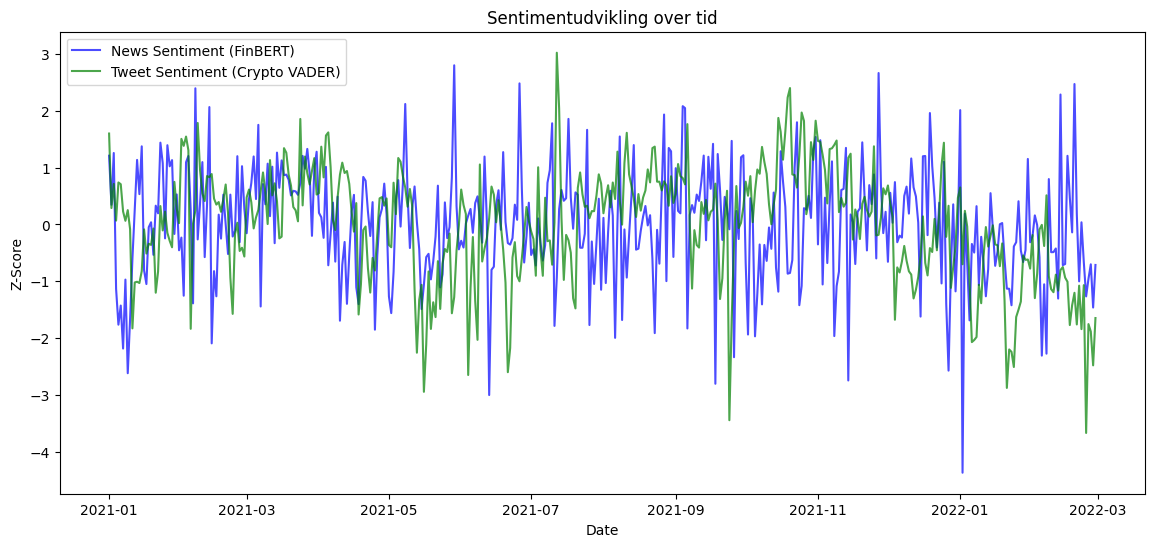

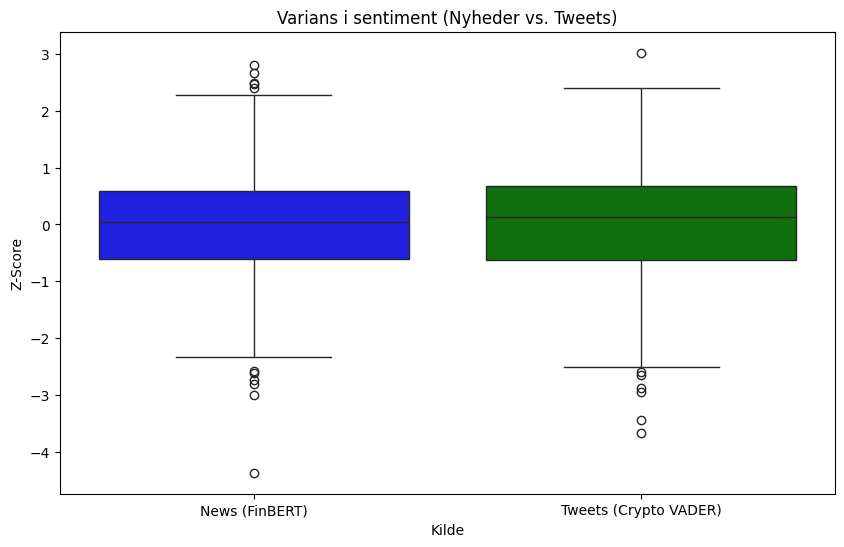

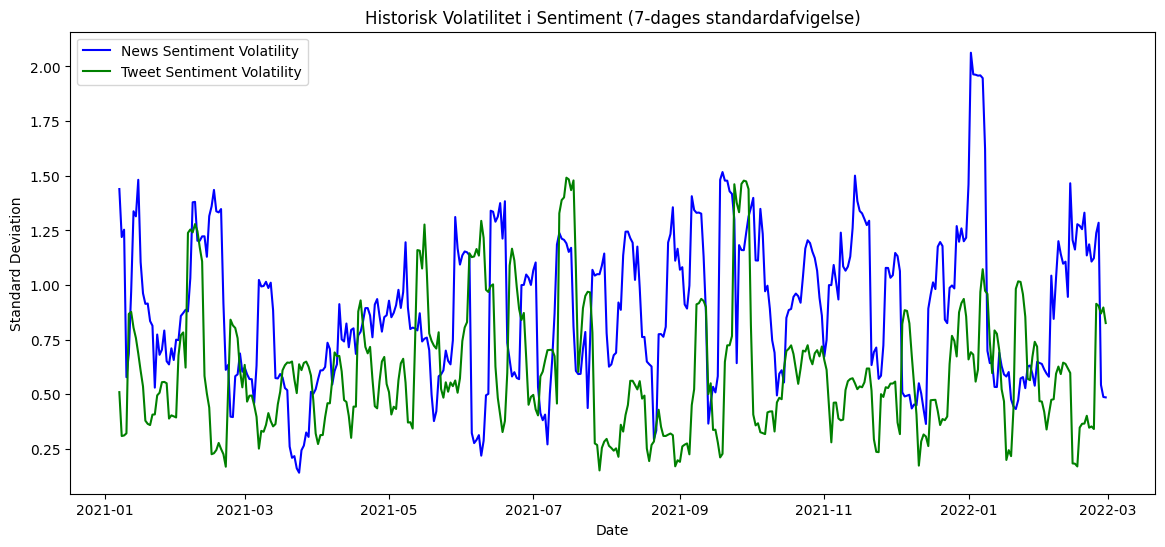

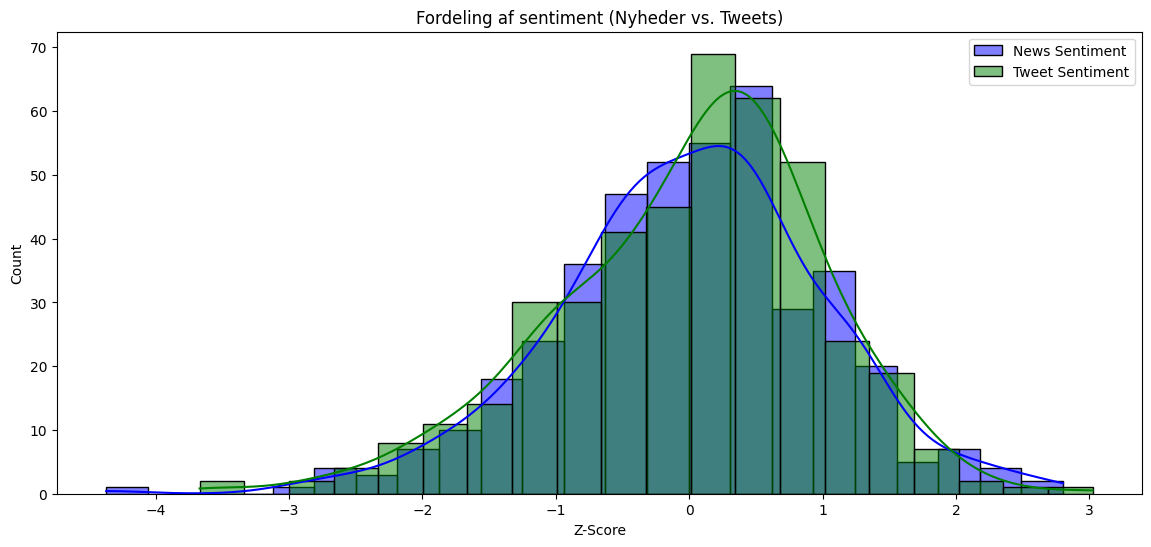

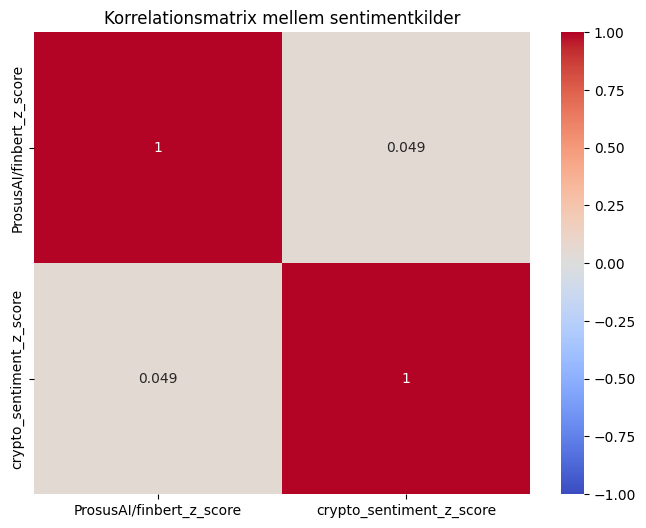

Statistik for sentimentdata:
       ProsusAI/finbert_z_score  crypto_sentiment_z_score
count              4.240000e+02              4.240000e+02
mean              -8.379042e-17             -3.351617e-17
std                1.000000e+00              1.000000e+00
min               -4.370548e+00             -3.670616e+00
25%               -6.051155e-01             -6.188948e-01
50%                3.957307e-02              1.363646e-01
75%                5.953353e-01              6.782673e-01
max                2.802063e+00              3.023432e+00

Ekstreme sentimentdage (Nyheder):
          date  ProsusAI/finbert_z_score
6   2021-01-07                 -2.184509
8   2021-01-09                 -2.618714
37  2021-02-07                  2.397166
43  2021-02-13                  2.066708
44  2021-02-14                 -2.093081
127 2021-05-08                  2.120776
148 2021-05-29                  2.802063
163 2021-06-13                 -3.003117
176 2021-06-26                  2.483570
246 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Indlæs data
news_path = r'C:\Users\Kasper Hassing\Desktop\Speciale_KryptoSentiment\data\news_data\bitcoin_news_14months_mean_zscore_final.csv'
tweets_path = r'C:\Users\Kasper Hassing\Desktop\Speciale_KryptoSentiment\data\twitter_posts\bitcoin_tweets_cleaned_21_vadercrypto_14month_final.csv'

news_df = pd.read_csv(news_path)
tweets_df = pd.read_csv(tweets_path)

# Konverter datoformater
news_df['date'] = pd.to_datetime(news_df['date'])
tweets_df['datetime'] = pd.to_datetime(tweets_df['datetime'])

# Flet data på dato
combined_df = pd.merge(news_df, tweets_df, left_on='date', right_on='datetime', suffixes=('_news', '_tweets'))
combined_df = combined_df.drop(columns=['datetime'])

# Statistikker
stats = combined_df[['ProsusAI/finbert_z_score', 'crypto_sentiment_z_score']].describe()

# Ekstremværdier (z-score > 2 eller < -2)
extreme_news = combined_df[combined_df['ProsusAI/finbert_z_score'].abs() > 2]
extreme_tweets = combined_df[combined_df['crypto_sentiment_z_score'].abs() > 2]

# Visualisering: Sentimentudvikling over tid
plt.figure(figsize=(14, 6))
plt.plot(combined_df['date'], combined_df['ProsusAI/finbert_z_score'], label='News Sentiment (FinBERT)', color='blue', alpha=0.7)
plt.plot(combined_df['date'], combined_df['crypto_sentiment_z_score'], label='Tweet Sentiment (Crypto VADER)', color='green', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.title('Sentimentudvikling over tid')
plt.legend()
plt.show()

# Visualisering: Boxplot for sentimentvarians
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df[['ProsusAI/finbert_z_score', 'crypto_sentiment_z_score']], palette=['blue', 'green'])
plt.title('Varians i sentiment (Nyheder vs. Tweets)')
plt.xlabel('Kilde')
plt.ylabel('Z-Score')
plt.xticks([0, 1], ['News (FinBERT)', 'Tweets (Crypto VADER)'])
plt.show()

# Visualisering: Historisk volatilitet (Rolling STD)
rolling_std_news = combined_df['ProsusAI/finbert_z_score'].rolling(window=7).std()
rolling_std_tweets = combined_df['crypto_sentiment_z_score'].rolling(window=7).std()
plt.figure(figsize=(14, 6))
plt.plot(combined_df['date'], rolling_std_news, label='News Sentiment Volatility', color='blue')
plt.plot(combined_df['date'], rolling_std_tweets, label='Tweet Sentiment Volatility', color='green')
plt.title('Historisk Volatilitet i Sentiment (7-dages standardafvigelse)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

# Histogram for sentimentfordeling
plt.figure(figsize=(14, 6))
sns.histplot(combined_df['ProsusAI/finbert_z_score'], kde=True, color='blue', label='News Sentiment', alpha=0.5)
sns.histplot(combined_df['crypto_sentiment_z_score'], kde=True, color='green', label='Tweet Sentiment', alpha=0.5)
plt.title('Fordeling af sentiment (Nyheder vs. Tweets)')
plt.xlabel('Z-Score')
plt.legend()
plt.show()

# Korrelationsmatrix
plt.figure(figsize=(8, 6))
correlation_matrix = combined_df[['ProsusAI/finbert_z_score', 'crypto_sentiment_z_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelationsmatrix mellem sentimentkilder')
plt.show()

# Udskriv statistik
print('Statistik for sentimentdata:')
print(stats)
print('\nEkstreme sentimentdage (Nyheder):')
print(extreme_news[['date', 'ProsusAI/finbert_z_score']])
print('\nEkstreme sentimentdage (Tweets):')
print(extreme_tweets[['date', 'crypto_sentiment_z_score']])
